In [Notes_Method_of_Conjugate_Directions](Notes_Method_of_Conjugate_Directions.ipynb) we chose A-orthogonal search directions.
Initial direction can be arbitrary. But why not take them as in [steepest descent](Notes_Steepest_Descent.ipynb) as residuals?


## Few old definitions
### Error and residual
$$\boxed{\vec{r}_i = \vec{b} - A \vec{x}_i}$$
$$A\cdot \bigg| \ \boxed{\vec{e}_i = \vec{x}_i - \vec{x}} \rightarrow  A \vec{e}_i  = -(\vec{b} - A\vec{x}_i)$$

error is related to residual via matrix $A$
$$\boxed{\vec{r}_i = - A \vec{e}_i }$$
### Residual update
$$\vec{r}_{i+1} = -A \vec{e}_{i+1} = -A(\vec{e}_i + \alpha_i \vec{d}_i) = \vec{r}_i - \alpha_i A\vec{d}_i$$

$$\boxed{\vec{r}_{i+1} = \vec{r}_i - \alpha_i A\vec{d}_i}$$
This expression shows that each next extended subspace explores added dimension $A \vec{d}_i$

## Orthogonality of search directions
Residual is orthogonal to search direction. 
From $\vec{d}_i^T\vec{r}_j  = 0 \ ; \ i \gt j$ on conjugate directions, as we choose search direction $\vec{d}_i$ along residual, so:
$$\vec{r}_i^T \vec{r}_{j} = 0 \ ; \ j \neq i$$

This expression shows that next search direction is orthogonal to hyperplane spanned by previous residual. This idea is heavily explored in original resource.

You can write that i-th search direction is constructed from space 
$$D_i = span\{\vec{d}_0, A \vec{d}_0, \dots A^{i-1}\vec{d}_0\}$$

Fact that next residual is orthogonal to previous once allows us to greatly simplify Gram-Schmidt (GS) orthogonalization process, since we dont have to subtract parallel projections, thus dont have to keep in memory all previous vectors.

Original Conjugate GS:
$$\vec{d}_i = \vec{u}_i -  \sum_{j=0}^{i-1} \beta_{ij} \vec{d}_j$$
$$\beta_{ij} = \frac{\vec{u}_i^T  A \vec{d}_j}{\vec{d}^T_j A \vec{d}_j}$$

we replace $\vec{u}_i$ with residual $\vec{r}_i$ and can show that due to orthogonality, most terms in a sum disappear:
$$\vec{r}_i \cdot\bigg|\vec{r}_{j+1} = \vec{r}_j - \alpha_j A\vec{d}_j  $$
$$\vec{r}_i^T\vec{r}_{j+1} = \vec{r}_i^T\vec{r}_j - \alpha_j \vec{r}_i^T A\vec{d}_j$$
Looking at definiton of $\beta_{ij}$, $i$-th vector is being orthogonalized, $j$-th search direction vector is projected onto.
$$\vec{r}_i^T A\vec{d}_j = \frac{1}{\alpha_j }\bigg(\vec{r}_i^T\vec{r}_j  - \vec{r}_i^T\vec{r}_{j+1} \bigg)$$
if $\boxed{i = j}$
$$\vec{r}_i^T A\vec{d}_i = \frac{1}{\alpha_j }\bigg(\vec{r}_i^T\vec{r}_i  - \underbrace{\vec{r}_i^T\vec{r}_{i+1} }_{0}\bigg) = \frac{1}{\alpha_j }\vec{r}_i^T\vec{r}_i $$
Case $i = j$ makes no sense since for index $j$ in orthogonalization sum: $0 < \boxed{j \leq i - 1}$

For the last term in a sum: $j = i - 1$ (or $i = j + 1$) 
$$\vec{r}_{i}^T A\vec{d}_{i-1} =\frac{1}{\alpha_{i-1} }\bigg(\underbrace{\vec{r}_{i}^T\vec{r}_{i-1}}_{0}  - \vec{r}_{i}^T\vec{r}_{i} \bigg) = - \frac{1}{\alpha_{i-1}} \vec{r}_{i}^T\vec{r}_{i}$$
For all terms up to $i - 1 \longrightarrow j \lt i - 1$ (or $i \gt j + 1$)
$$\vec{r}_i^T A\vec{d}_{j \lt i - 1}  =  \frac{1}{\alpha_i }\bigg(\underbrace{\vec{r}_i^T\vec{r}_{j \lt i - 1}}_{0}  - \underbrace{\vec{r}_i^T\vec{r}_{j \lt i - 1} }_{0}\bigg) = 0$$

So
$$\beta_{ij} = \frac{\vec{r}_i^T  A \vec{d}_j}{\vec{d}^T_j A \vec{d}_j} \ ; j \in [0,\dots,i-1]$$

for last term:
$$\beta_{i[j = i - 1]}  =  - \frac{1}{\alpha_{i-1}} \frac{\vec{r}_{i}^T\vec{r}_{i}}{\vec{d}^T_j A \vec{d}_j}$$
else
$$\beta_{i[j \lt i - 1]} = \frac{\vec{r}_i^T A\vec{d}_{j \lt i - 1} }{\vec{d}^T_j A \vec{d}_j}= 0$$

Which means
$$\vec{d}_i = \vec{u}_i -  \sum_{j=0}^{i-1} \beta_{ij} \vec{d}_j = \vec{r}_i + \frac{1}{\alpha_{i-1}} \frac{\vec{r}_{i}^T\vec{r}_{i}}{\vec{d}^T_{i-1} A \vec{d}_{i-1}} \vec{d}_{i-1}$$

from Conjugate directions (linea search) we know
$$\boxed{\alpha_i = \frac{\vec{d}_i^T \vec{r}_i }{\vec{d}_i^T A \vec{d}_i}}$$
$$\alpha_{i-1} = \frac{\vec{d}_{i-1}^T \vec{r}_{i-1} }{\vec{d}_{i-1}^T A \vec{d}_{i-1}}$$
and
$$\vec{d}_i = \vec{r}_i - \underbrace{\frac{\vec{d}_{i-1}^T A \vec{d}_{i-1}}{\vec{d}_{i-1}^T \vec{r}_{i-1} }}_{\alpha_{i-1}^{-1}} \frac{\vec{r}_{i}^T\vec{r}_{i}}{\vec{d}^T_{i-1} A \vec{d}_{i-1}} \vec{d}_{i-1} = \vec{r}_i +  \underbrace{\bigg(\frac{\vec{r}_{i}^T\vec{r}_{i}}{\vec{d}_{i-1}^T \vec{r}_{i-1} }\bigg)}_{\beta_{i:i-1}}\vec{d}_{i-1}  $$

So coefficient $\beta$ for a term that orthogonalizes $\vec{d}_i$ is
$$\boxed{\beta_{i:i-1} = \beta_{i} = \frac{\vec{r}_{i}^T\vec{r}_{i}}{\vec{d}_{i-1}^T \vec{r}_{i-1}} = \frac{\vec{r}_{i}^T\vec{r}_{i}}{\vec{r}_{i-1}^T \vec{r}_{i-1}}}$$
not sure if $\vec{d}_{i}^T \vec{r}_{i} = \vec{r}_{i}^T \vec{r}_{i}$ needs a proof (Eq 42 in source). 

Might as well

$$\vec{d}_i = \vec{u}_i -  \sum_{j=0}^{i-1} \beta_{ij} \vec{d}_j \bigg| \cdot \vec{r}_i$$
$$\vec{d}_i^T\vec{r}_i = \vec{u}_i^T\vec{r}_i -  \sum_{j=0}^{i-1} \beta_{ij} \underbrace{\vec{d}_j^T\vec{r}_i}_{0}$$
and change $\vec{u}_i \rightarrow \vec{r}_i$
$$\vec{d}_i^T\vec{r}_i = \vec{u}_i^T\vec{r}_i = \vec{r}_i^T\vec{r}_i $$
$$\boxed{\alpha_i = \frac{\vec{d}_i^T \vec{r}_i }{\vec{d}_i^T A \vec{d}_i} = \frac{\vec{r}_i^T\vec{r}_i}{\vec{d}_i^T A \vec{d}_i} }$$

Algorithm contains the following elements
*   $$\vec{d}_0 = \vec{r}_0 = \vec{b}_0 - A \vec{x}_0 \ \text{ (Initialization)}$$
*   $$\alpha_i = \frac{\vec{r}_i^T\vec{r}_i}{\vec{d}_i^T A \vec{d}_i} \ \text{ (Line search step size)}$$
*   $$\vec{x}_{i+1}  = \vec{x}_i  + \alpha_i \vec{d}_i \ \text{ (Line search)}$$
*   $$\vec{r}_{i+1} = \vec{r}_i - \alpha_i A\vec{d}_i \ \text{ (Beginning of this notebook)}$$
*   $$\beta_{i+1} = \frac{\vec{r}_{i+1}^T\vec{r}_{i+1}}{\vec{r}_{i}^T \vec{r}_{i}}\ \text{ (Orthogonalization coef)} $$
*   $$\vec{d}_{i+1} = \vec{r}_{i+1} + \beta_{i+1} \vec{d}_i \ \text{ (Orthogonalization)} $$

In [25]:
import matplotlib.pyplot as plt
import numpy as np

A = np.array([[3,2],[2,6]], dtype=float)
b = np.array([2,-8], dtype=float)

xi = np.array([-2,2], dtype=float)

xs = [xi.copy()]
r_old = b - A @ xi 
res = [np.linalg.norm(r_old)]
d = r_old.copy()
while True:
    alpha   = np.dot(r_old,r_old)/ (d @ A @ d)
    xi      += alpha * d
    r_new   = r_old - alpha * A @ d
    xs.append(xi.copy())
    res.append(np.linalg.norm(r_new))
    if res[-1] < 0.001: break
    beta    = np.dot(r_new,r_new)/np.dot(r_old,r_old)
    d       = r_new + beta*d
    r_old   = r_new
 
res

[16.492422502470642, 8.345563194021288, 1.831026719408895e-15]

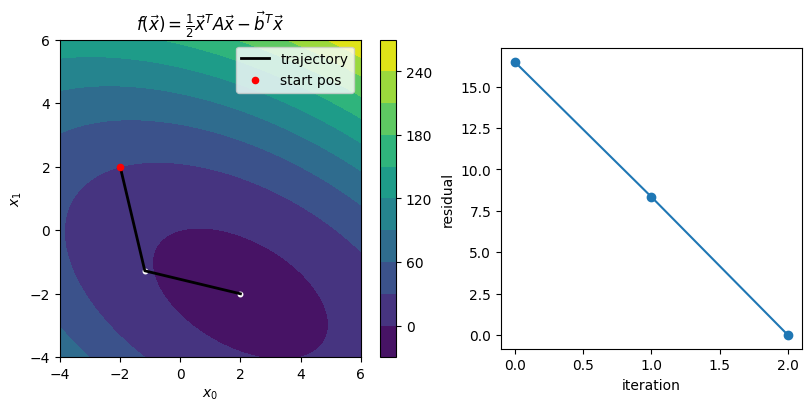

In [27]:
T = lambda x: np.moveaxis(x, -1, -2) 
b2 = b.reshape(-1,1)

def f(x):
    return (0.5*T(x) @ A @ x - T(b2) @ x)

N_samples = 200
dom = (-4,6)
dom1 = np.linspace(*dom, N_samples)
X,Y = XY = np.meshgrid(dom1,dom1)
domain_xy = np.stack(XY, axis = -1)[...,None]
obj_fn = f(domain_xy).reshape(N_samples,N_samples)
fig, axs = plt.subplots(1,2, figsize = (2*4, 4), layout='constrained')

c = axs[0].contourf(X,Y, obj_fn, extent = [*dom*2],levels = 10)
plt.gca().set_aspect(1)
plt.colorbar(c)

axs[0].plot(*np.array(xs).T.reshape(2,-1), color = 'k', lw = 2, label = 'trajectory')
axs[0].scatter(*np.array(xs).T.reshape(2,-1), color = 'w', lw = 2,s  = 5)
axs[0].scatter(*xs[0], c = 'r', s = 20, zorder = 2, label = 'start pos')
axs[0].set_xlabel(r'$x_0$')
axs[0].set_ylabel(r'$x_1$')
axs[0].set_title(r'$f(\vec{x}) = \frac{1}{2} \vec{x}^T A \vec{x} - \vec{b}^T\vec{x}$')
axs[0].legend();

axs[1].plot(res)
axs[1].scatter(range(len(res)),res)
axs[1].set_xlabel('iteration')
axs[1].set_ylabel('residual')
axs[1].set_aspect(2/max(res))